In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
### if want to save to one file
save_file = True
if save_file == True:
    import sys
    file = open('swog_prelim_analysis_2.txt', 'a')
    sys.stdout = file

In [3]:
# load preprocessed lists (from Bhavani_analysis)
pub_list = pd.read_csv('Pub_List.csv').iloc[:,1:]
trial_list = pd.read_csv('Trial_List.csv').iloc[:,1:]
trial_list_com = pd.read_csv('Trial_List_Complete.csv').iloc[:,1:]

header_list = ['STUDYID','PUBTITLE','PUBNAME','PUBYEAR','Phase']
pub_list = pub_list.reindex(columns = header_list)

# adding phase data
# Adding phase

# pub_list2 = pub_list

for trial in trial_list['STUDYID']:
    for index in pub_list.loc[pub_list.STUDYID==trial].index.values.tolist():
        pub_list.loc[index, 'Phase'] = trial_list.loc[trial_list['STUDYID']==trial, 'Phase'][trial_list.loc[trial_list['STUDYID']==trial].index.values[0]]
    
    
pub_list.head()


,STUDYID,PUBTITLE,PUBNAME,PUBYEAR,Phase
0,S0226,Overall Survival with Fulvestrant plus Anastro...,New England Journal of Medicine Mar 28;380(13)...,2019,III
1,S1610,COlorectal Cancer Metastatic dMMR Immuno-Thera...,"J Clin Oncol 37, 2019 (suppl 4; abstr TPS728);...",2019,NaN
2,S0816,"Serum levels of TARC, MDC, IL10 and soluble CD...",Blood Apr 18;133(16):1762-1765; Feb 5. pii: b...,2019,NaN
3,C80405,Diet quality and survival in metastatic colore...,American Institute for Cancer Research (AICR) ...,2019,NaN
4,S1507,S1507: Phase II study of docetaxel and trameti...,J Clin Oncol 37(suppl; abstr 9021); American S...,2019,NaN


In [4]:
trial_list_com

punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
def remove_punc(my_str):
    no_punct = ''
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char
        pun = no_punct
    return pun

disease_head = ['Gastrointestinal Cancer', 'Genitourinary Cancer', 'Gynecologic Cancer', 
                'Brain Cancer', 'Lung Cancer', 'Sarcoma', 'Lymphoma', 'Leukemia', 'Myeloma', 'Head and Neck Cancer', 'Melanoma',
                'Breast Cancer', 'Other']

disease_dic = {'S_D':{
          'Gastrointestinal Cancer':['gastric', 'colon', 'colorectal', 'rectal', 'anal', 'pancreas',
                                     'pancreatic', 'stomach', 'hepatoma', 'bowel', 'gist',
                                     'gastrointestinal', 'islet', 'esophagus', 'adrenal', 'esophageal',
                                     'bile', 'gallbladder', 'hcc', 'panc'],
          'Genitourinary Cancer': ['prostate', 'bladder', 'renal', 'penis','penile', 'seminoma', 'germ',
                                   'non-seminomatous', 'pca', 'testicular', 'extragonadal', 'kidney','gu',
                                    'prostate', 'guprostate', 'prostatic'],
          'Gynecologic Cancer': ['endometrial', 'ovarian', 'cervical', 'vaginal', 'vulvar', 'cervix',
                                 'genital', 'gynecological', 'gyn'],
          'Brain Cancer': ['brain', 'glioma', 'meningioma', 'pituitary', 'ependymoma', 'medulloblastoma',
                           'schwannoma', 'glioblastoma', 'astrocytoma', 'astrocytomas','cns', 'nervous',
                           'meningiomas', 'gliomas'],
          'Lung Cancer': ['lung', 'nsclc', 'sclc', 'bronchogenic', 'lsclc'],
          'Sarcoma': ['sarcoma', 'sarcomas', 'mesothelioma', 'chrondrosarcoma', 'osteosarcoma'],
    
          'Lymphoma': ['hodgkins', 'hodgkin', 'non-hodgkins','nonhodgkins', 'lymphoma', 'lymphomas', 
                                "hodgkin's", 'nhl'],
    
          'Leukemia': ['cll', 'cml', 'myeloma', 'leukemia', 'dlbcl', 'aml'],
    
          'Myeloma': ['myeloma', 'mm', 'myelomavmcp'],
    
          'Head and Neck Cancer': ['neck', 'oral', 'tonsil', 'larnyx', 'maxillary', 'salivary', 'thymoma'],
          'Melanoma': ['melanoma', 'melanomas'],
          'Breast Cancer': ['dcis', 'breast'],
    
          'Other': ['fungoides', 'mds', 'plasmacytoma', 'myelodysplastic']}}

# disease_dic['S_D']['Sarcoma']

# print(sum(trial_list_com['Disease'].isnull()))

# Add disease names
punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''

for i in disease_head:
    for j in range(len(trial_list_com)):
        
        mylist = disease_dic['S_D'][i]
        title_name = remove_punc(trial_list_com.loc[j, 'Title'])

        # if null in disease and if title contains key words then add disease site
        try:
            if (np.isnan(trial_list_com.loc[j, 'Disease'])==True) and (sum([x in mylist for x in title_name.lower().split()])>0):
                trial_list_com.loc[j, 'Disease'] = i
                
        except (AttributeError, TypeError) as e: pass
   
print(sum(trial_list_com['Disease'].isnull()))   
        
#trial_list_com.loc[trial_list_com['Disease'].isnull(), 'Title'].to_csv('to_bhavani.csv')

In [5]:

def find_trial(name, pub_list=pub_list):
    for i in range(len(pub_list)):
        if name in pub_list.loc[i, 'STUDYID']:
            display(pub_list.iloc[i].T)

        else: pass
        
# find_trial('19')

In [6]:
pub_list

,STUDYID,PUBTITLE,PUBNAME,PUBYEAR,Phase
0,S0226,Overall Survival with Fulvestrant plus Anastro...,New England Journal of Medicine Mar 28;380(13)...,2019,III
1,S1610,COlorectal Cancer Metastatic dMMR Immuno-Thera...,"J Clin Oncol 37, 2019 (suppl 4; abstr TPS728);...",2019,NaN
2,S0816,"Serum levels of TARC, MDC, IL10 and soluble CD...",Blood Apr 18;133(16):1762-1765; Feb 5. pii: b...,2019,NaN
3,C80405,Diet quality and survival in metastatic colore...,American Institute for Cancer Research (AICR) ...,2019,NaN
4,S1507,S1507: Phase II study of docetaxel and trameti...,J Clin Oncol 37(suppl; abstr 9021); American S...,2019,NaN
5,E2810,"Randomized, DoubleBlind\r\nPhase III Study of ...",J Clin Oncol 37(suppl; abstr 4502); American S...,2019,NaN
6,S1400C,SWOG S1400C (NCT02785939): A Phase II Study of...,Journal of Thoracic Oncology Jul 11 [Epub ahea...,2019,NaN
7,S9217,A Collaborative Analysis of Individual Partici...,Cancer Research Jan 1;79(1):274-285,2019,NaN
8,S0000,A Collaborative Analysis of Individual Partici...,Cancer Research Jan 1;79(1):274-285,2019,III
9,S9916,Overall Survival of Black and White Men With M...,Journal of Clinical Oncology Feb 10;37(5):403-410,2019,NaN


In [7]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

print('GENERAL OVERVIEW OF PUB_LIST')



def histogram(x, ylabel, num_bin=10, fontsize=100):
    num_bins = num_bin
    plt.figure(figsize=(100,60))
    plt.rcParams.update({'font.size': fontsize})
    n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
    plt.ylabel('# Publications')
    plt.xlabel(f"Number of bins {num_bins}")
    plt.title('Histogram')
    plt.show()
    
x = num_pub_by_trial = pub_list.groupby('STUDYID')['STUDYID'].value_counts()
histogram(x,  num_bin=5, ylabel='# Publications')

def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.



def bar(df_main, df, x, y, xlabel, ylabel, title='title', font=30):
    
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': font})
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)
    plt.xlabel(xlabel)
    plt.title(title)
    ax = plt.bar(df[x], df[y])
    plt.show()
    
    print(df_main.groupby(x)[x].count(),'\n')

    
xx = pd.DataFrame({'count':pub_list.groupby('PUBYEAR').size()}).reset_index()    
bar(pub_list, xx, 'PUBYEAR', 'count', 'Years Published', '# Publications')
print(f"Total trials: {len(pub_list)}\nData available: {sum(xx['count'])}")


    
xx = pd.DataFrame({'count':pub_list.groupby('Phase').size().sort_values()}).reset_index()    
bar(pub_list, xx, 'Phase', 'count', 'Phase', '# Publications')
print(f"Total trials: {len(pub_list)}\nData available: {sum(xx['count'])}")


<Figure size 10000x6000 with 1 Axes>

<Figure size 2000x1000 with 1 Axes>

<Figure size 2000x1000 with 1 Axes>

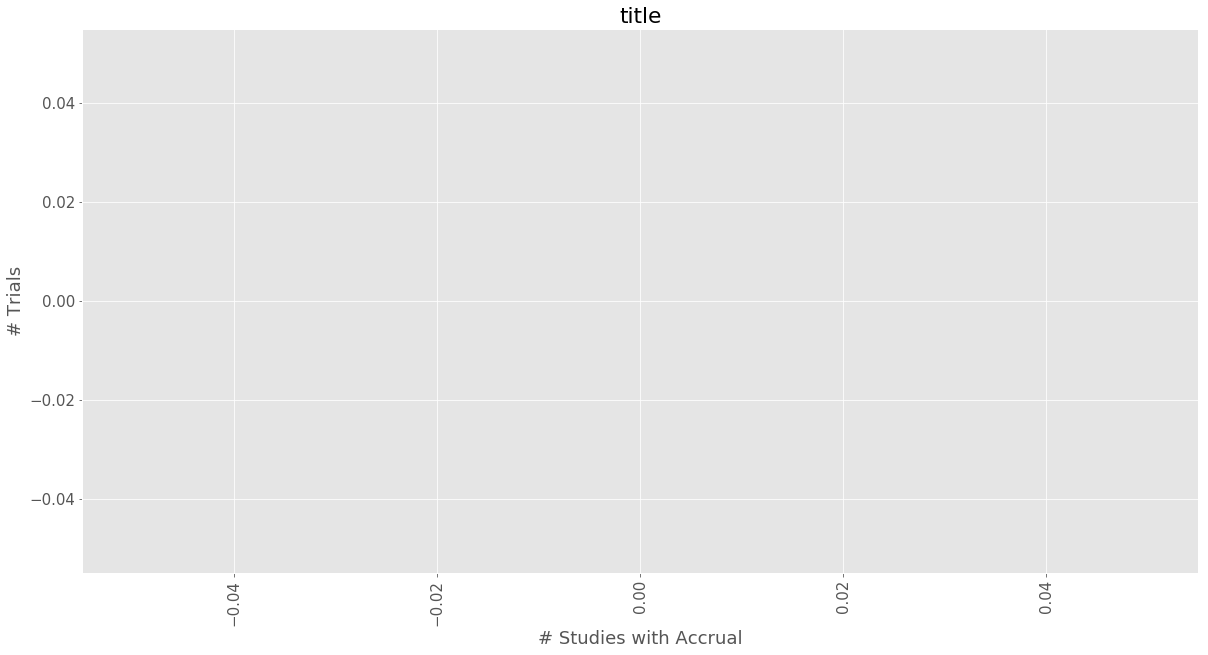

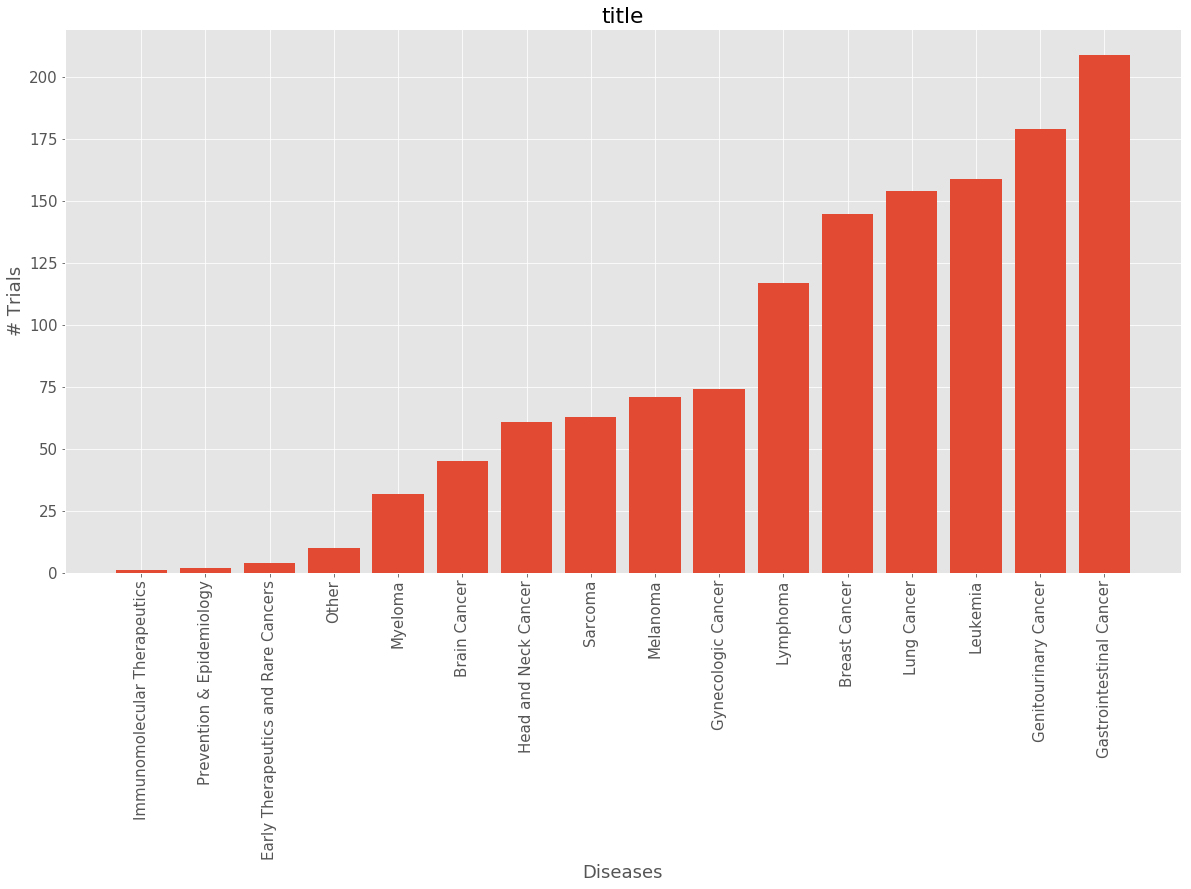

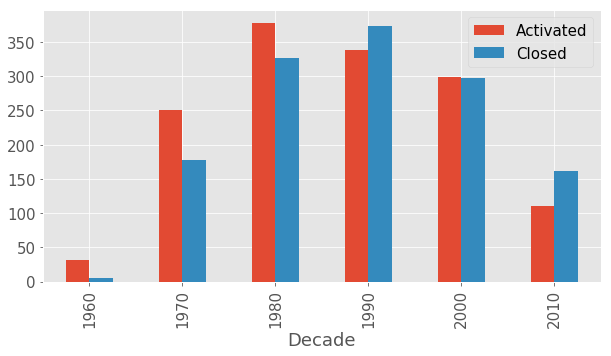

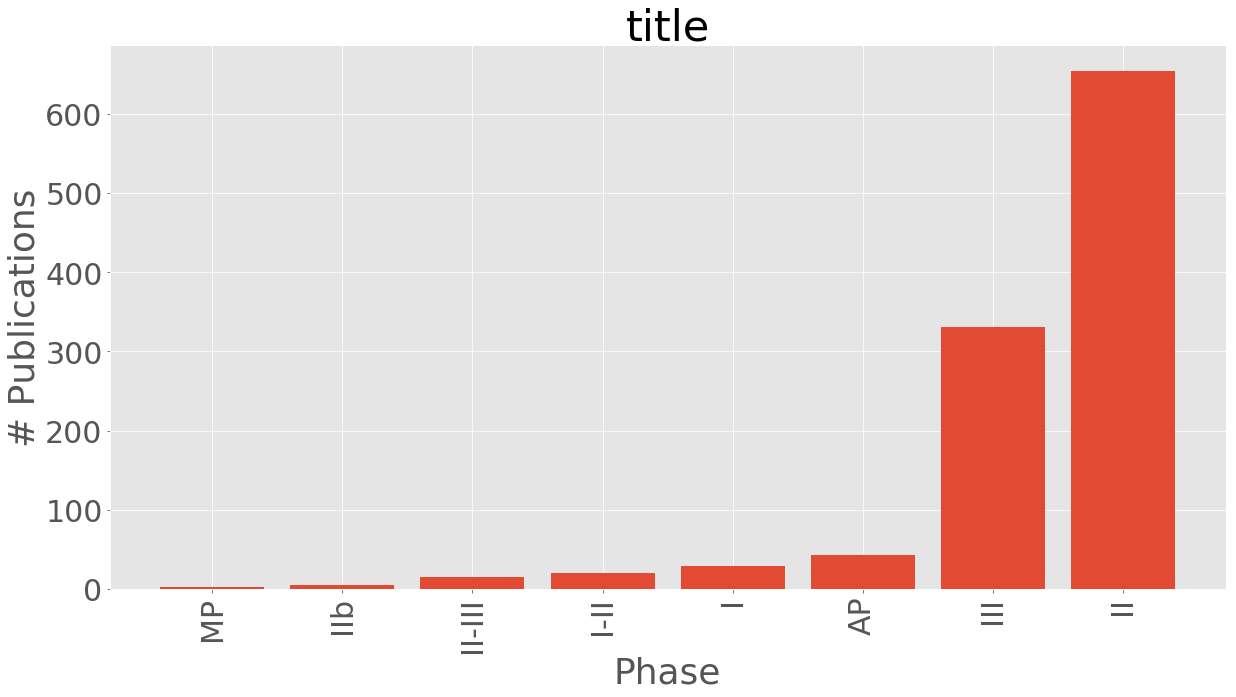

In [8]:
import matplotlib.pyplot as plt
from natsort import natsorted 
plt.style.use('ggplot')


print('GENERAL OVERVIEW OF PUB_LIST\n')

print(trial_list_com.head())


print('LOOKING AT GENERAL TIRAL LIST BY ACCRUAL')
xx = pd.DataFrame({'count':trial_list_com.groupby('Accrual').size()}).reset_index()

# remove % and made numeric to sort properly
if '%' in xx.Accrual:
    xx.Accrual = xx.Accrual.str.strip('%')
xx.sort_values(by='Accrual')
xx.Accrual = pd.to_numeric(xx.Accrual, errors='coerce')

bar(trial_list_com, xx, 'Accrual', 'count', '# Studies with Accrual', '# Trials', font=15)
print(f"Total trials: {len(trial_list_com)}\nData available: {sum(xx['count'])}")
      
print('LOOKING AT GENERAL TRIAL LIST BY DISEASE SITE')
xx = pd.DataFrame({'count':trial_list_com.groupby('Disease').size().sort_values()}).reset_index()
bar(trial_list_com, xx, 'Disease', 'count', 'Diseases', '# Trials', font=15)
print(f"Total trials: {len(trial_list_com)}\nData available: {sum(xx['count'])}")
      
print('LOOKING AT GENERAL TRIAL LIST BY DECADE ACTIVATED/CLOSED')

def bar_decade(df_main, df, x, y, xlabel, ylabel, font=30):
    
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': font})
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)
    plt.xlabel(xlabel)
    ax = plt.bar(df[x], df[y])
    plt.show()

def convert_sort_date_to_df(df_sorted, count_title='count'):
    x = pd.DataFrame({'count':df_sorted}).reset_index()
    return x

dff = trial_list_com
dff['Activated_dt'] = pd.to_datetime(dff['Activated'],infer_datetime_format=True)
dff['Closed_dt'] = pd.to_datetime(dff['Closed'],infer_datetime_format=True)
decade_closed = dff.set_index('Closed_dt')
decade_act = dff.set_index('Activated_dt')

xx = convert_sort_date_to_df(decade_closed.groupby((decade_closed.index.year//10)*10).count()['STUDYID'])
yy = convert_sort_date_to_df(decade_act.groupby((decade_act.index.year//10)*10).count()['STUDYID'])

X = pd.concat([yy,xx['count'].rename(columns={'count':'count1'})], axis=1)


X = X.rename(columns={'Activated_dt':'Decade',
                                     'count':'Activated', 
                                      0:'Closed'})
X.Decade = X['Decade'].astype(int)


X.set_index(['Decade'], inplace=True)
X.plot.bar(figsize=(10,5))
plt.show()
print(xx,'\n')
print(yy,'\n')
print(f"Total trials: {len(trial_list_com)}\nActivated Data:\
      {sum(X.Activated)}\nClosed Data: {sum(X.Closed)}")

# Phase data in trial list
print('LOOKING AT GENERAL TRIAL LIST BY PHASE')
xx = pd.DataFrame({'count':trial_list_com.groupby('Phase').size().sort_values()}).reset_index()    
bar(trial_list_com, xx, 'Phase', 'count', 'Phase', '# Publications')
print(f"Total trials: {len(trial_list_com)}\nData available: {sum(xx['count'])}")

In [9]:
# abst_keywords = ['Conference', 'suppl','Suppl', 'abstr', 'oral', 'poster', 'Symposium', 'ASCO',
#                  'session', 'Meeting', 'ESTRO', 'Abst.', 'Annual','#', 'IASLC', 'Proceedings',
#                  'presentation', 'Proc of the American Society of Clinical Oncology',
#                  'Proc AUA', 'Proc AACR', 'Rome: University of Rome', 'AACR',
#                  'Clinical Research 29:829A', 'Abstracts', 'Congress']
abst_keywords = ['Conference', 'suppl','Suppl', 'abstr', 'oral', 'poster', 'Symposium', 'ASCO',
                 'session', 'Meeting', 'ESTRO', 'Abst.', 'Annual','#', 'IASLC', 'Proceedings',
                 'presentation', 'Proc of the American Society of Clinical Oncology',
                 'Proc AUA', 'Proc AACR', 'Rome: University of Rome', 'AACR',
                 'Clinical Research 29:829A', 'Abstracts', 'Congress']
extra_1 = [str(s)+'a' for s in range(10)]
extra_2 = [str(s)+'A' for s in range(10)]
abst_keywords.extend(extra_1)
abst_keywords.extend(extra_2)

In [10]:
# stripping % from accrual and making value an int
for trial in trial_list_com.loc[trial_list_com.Accrual.notnull(), 'STUDYID']:
    ind = trial_list_com.loc[trial_list_com.STUDYID==trial, 'Accrual'].index.values.tolist()[0]
    trial_list_com.Accrual.iloc[ind] = int(str(trial_list_com.Accrual.iloc[ind]).strip('%'))

C:\Users\s185479\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [11]:
study_close = int(pd.to_datetime(swog_dic['S'][trial]['Closed'], infer_datetime_format=True).year)
        
            abst_list_time.extend(abst_time - study_close)   
            manu_list_time.extend(manu_time - study_close)

# create dictionary for storage of publications given trials
swog_dic = {'S':{
    name:{'Title':title, 
                       'Publications':[], 
                       'Manuscript':[],
                       'Manuscript_Date':[],
                       'Abstract':[],
                       'Abstract_Date': [],
                       'Activated': [],
                       'Closed': [],
#                        'Year_Close_Abs': [],
#                        'Year_Act_Abs': [],
#                        'Year_Close_Man': [],
#                        'Year_Act_Man': [],
                       'Disease': [],
                       'Phase': [],
                       'Accrual': []
         } for name,title in zip(trial_list_com['STUDYID'],trial_list_com.Title)}}

# Sort through publications and append to dictionary
for trial in trial_list_com['STUDYID']:
# for trial in list(set(pub_list.STUDYID)):
#     print(trial)
#     if len([s for s in xx if s in yy])
    
    swog_dic['S'][trial]['Activated'] = trial_list_com.loc[trial_list_com.STUDYID==trial, 'Activated'][trial_list_com.loc[trial_list_com.STUDYID==trial, 'Activated'].index.values.tolist()[0]]
    swog_dic['S'][trial]['Closed'] = trial_list_com.loc[trial_list_com.STUDYID==trial, 'Closed'][trial_list_com.loc[trial_list_com.STUDYID==trial, 'Closed'].index.values.tolist()[0]]
    swog_dic['S'][trial]['Disease'] = trial_list_com.loc[trial_list_com.STUDYID==trial, 'Disease'][trial_list_com.loc[trial_list_com.STUDYID==trial, 'Disease'].index.values.tolist()[0]]
    swog_dic['S'][trial]['Phase'] = trial_list_com.loc[trial_list_com.STUDYID==trial, 'Phase'][trial_list_com.loc[trial_list_com.STUDYID==trial, 'Phase'].index.values.tolist()[0]]
    swog_dic['S'][trial]['Accrual'] = trial_list_com.loc[trial_list_com.STUDYID==trial, 'Accrual'][trial_list_com.loc[trial_list_com.STUDYID==trial, 'Accrual'].index.values.tolist()[0]]
    
    for index in pub_list.loc[pub_list.STUDYID==trial].index.values.tolist():
        
        swog_dic['S'][trial]['Publications'].append(pub_list.PUBTITLE.iloc[index])
        if any(pub in pub_list.PUBNAME.iloc[index] for pub in abst_keywords)==True:
            swog_dic['S'][trial]['Abstract'].append(pub_list.PUBTITLE.iloc[index])
            swog_dic['S'][trial]['Abstract_Date'].append(pub_list.PUBYEAR.iloc[index])
        else:
            swog_dic['S'][trial]['Manuscript'].append(pub_list.PUBTITLE.iloc[index])
            swog_dic['S'][trial]['Manuscript_Date'].append(pub_list.PUBYEAR.iloc[index])

            



IndentationError: unexpected indent (<ipython-input-11-43b9e9ccb3c3>, line 3)

In [ ]:
# send to excel document
def dic_to_excel(dic, group, trials, excel_name):
    
    writer = pd.ExcelWriter(excel_name, engine='xlsxwriter')
    
    for trial in trials:
        manuscript = dic[group][trial]['Manuscript']
        manuscript_date = dic[group][trial]['Manuscript_Date']
        abstract = dic[group][trial]['Abstract']
        abstract_date = dic[group][trial]['Abstract_Date']
    
        x = pd.DataFrame([manuscript, 
                          manuscript_date, 
                          abstract, 
                          abstract_date]).rename(index={0:'Manuscript',
                                                        1:'Manuscript Date',
                                                        2:'Abstract',
                                                        3:'Abstract Date'})
        x.to_excel(writer, sheet_name=trial)
    
    writer.save()
    
    return 
b_list_test = ['S8691','S9126','S9032','S0106','S9031','S9617','S9500','S9108','S8706','S8600','C9710',
               'S0805','S0703','S0432','S0301','S0530','S0605','S9030','S0325','S1117','S9058'] 

random_list = ['S9207','S9424','E1505','S9308','S9712']

b_list_test.extend(random_list)
b_list_test

dic_to_excel(swog_dic,'S', b_list_test, 'multi_trial_bhavani_list.xlsx')


In [ ]:
# swog_dic = {'S':{
#     name:{'Title':title, 
#                        'Publications':[], 
#                        'Manuscript':[],
#                        'Manuscript_Date':[],
#                        'Abstract':[],
#                        'Abstract_Date': []
#          } for name,title in zip(trial_list['Trial Number'],trial_list.Title)}}

# trial='S0106'
# for index in pub_list.loc[pub_list.STUDYID==trial].index.values.tolist():
    
#     swog_dic['S'][trial]['Publications'].append(pub_list.PUBTITLE.iloc[index])
#     if any(pub in pub_list.PUBNAME.iloc[index] for pub in abst_keywords)==True:
#         print(index)
#         print("Abstract")
#         print(pub_list.PUBNAME.iloc[index])
#         print(pub_list.PUBTITLE.iloc[index])
#         swog_dic['S'][trial]['Abstract'].append(pub_list.PUBTITLE.iloc[index])
#         swog_dic['S'][trial]['Abstract_Date'].append(pub_list.PUBYEAR.iloc[index])
#     else:
#         print(index)
#         print("Manuscript")
#         swog_dic['S'][trial]['Manuscript'].append(pub_list.PUBTITLE.iloc[index])
#         swog_dic['S'][trial]['Manuscript_Date'].append(pub_list.PUBYEAR.iloc[index])

In [ ]:

# print(f"Total number of protocols: {len(trial_list_com)}\n")

# # Number of Protocols by Disease Site
# print('\nNumber of Protocols By Disease Site')
# print(trial_list_com.groupby('Disease')['Disease'].count())
# print('')

# # Number of Protocols By Phase
# print('\nNumber of Protocols By Phase')
# print(trial_list_com.groupby('Phase')['Phase'].count())
# print(f"Number of trials missing Phase information: {trial_list_com['Phase'].isna().sum()}")
# # print(f"Unique sets of phases: {})
      
# # number of trials opened by decade
# dff = trial_list_com
# dff['Activated_dt'] = pd.to_datetime(dff['Activated'],infer_datetime_format=True)
# dff['Closed_dt'] = pd.to_datetime(dff['Closed'],infer_datetime_format=True)
# decade_act = dff.set_index('Activated_dt')
# print('\nNumber of Protocols opened by decade--Activated')
# print(decade_act.groupby((decade_act.index.year//10)*10).count()['STUDYID'])
      


In [ ]:
def decade_index_for_groupby(df):
    
    dff = df
    dff['Activated_dt'] = pd.to_datetime(dff['Activated'],infer_datetime_format=True)
    dff['Closed_dt'] = pd.to_datetime(dff['Closed'],infer_datetime_format=True)
    decade_closed = dff.set_index('Closed_dt')
    decade_act = dff.set_index('Activated_dt')
    
    return decade_closed, decade_act

decade_closed, decade_act = decade_index_for_groupby(trial_list_com)

def decade_bar_plot(df, title, figsize=(20,5)):
    
    decade_closed, decade_act = decade_index_for_groupby(df)
    
    xx = convert_sort_date_to_df(decade_closed.groupby((decade_closed.index.year//10)*10).count()['STUDYID'])
    yy = convert_sort_date_to_df(decade_act.groupby((decade_act.index.year//10)*10).count()['STUDYID'])

    X = pd.concat([yy,xx['count'].rename(columns={'count':'count1'})], axis=1)


    X = X.rename(columns={'Activated_dt':'Decade',
                                         'count':'Activated', 
                                          0:'Closed'})
    X.Decade = X['Decade'].astype(int)


    X.set_index(['Decade'], inplace=True)
    X.plot.bar(figsize=figsize, title=title)
    plt.show()
    print(xx,'\n')
    print(yy,'\n')
    print(f"Total trials: {len(trial_list_com)}\nActivated Data:\
          {sum(X.Activated)}\nClosed Data: {sum(X.Closed)}")

    
    
decade_bar_plot(trial_list_com, title='Using all Trial data')
decade_bar_plot(trial_list_com.loc[(trial_list_com.Closed.notnull()) & (trial_list_com.Activated.notnull())],
                title=f"Excluding null values for activated and closed\nNull values:\
                {len(trial_list_com.loc[(trial_list_com['Closed'].isnull()) | (trial_list_com['Activated'].isnull())])}")



In [ ]:

# Phase data in trial list
print('LOOKING AT GENERAL TRIAL LIST BY PHASE')
xx = pd.DataFrame({'count':trial_list_com.groupby('Phase').size().sort_values()}).reset_index()    
bar(trial_list_com, xx, 'Phase', 'count', 'Phase', '# Publications', title='All trial data')

#Number of Closed Protocols by Disease Site
dff = trial_list_com.loc[trial_list_com.Closed.notnull()]
print('Number of closed protocols by disease site')
print('Only evaluating protocols with closed dates')
# print(dff.groupby('Disease')['Disease'].count())
xx = pd.DataFrame({'count':dff.groupby('Disease').size().sort_values()}).reset_index()    
bar(dff, xx, 'Disease', 'count', 'Diseases', '# Publications', title=f"All Data with close data\nWithout close data:\
    {len(trial_list_com[trial_list_com.Closed.isnull()])}")


# #Number of trials closed by decade (NEED TO MAKE SURE ALL ARE CLOSED)
# dff['Closed_dt'] = pd.to_datetime(dff['Closed'],infer_datetime_format=True)
# decade_clo = dff.set_index('Closed_dt')
# print('\nNumber of closed protocol by decade')
# print('Only evaluating protocols with closed dates')
# print(decade_clo.groupby((decade_clo.index.year//10)*10).count()['STUDYID'])

# #Number of trials activated by decade 
# dff['Activated_dt'] = pd.to_datetime(dff['Activated'],infer_datetime_format=True)
# decade_act = dff.set_index('Activated_dt')
# print('\nNumber of protocol opened by decade')
# print('Only evaluating protocols with closed dates')
# print(decade_act.groupby((decade_act.index.year//10)*10).count()['STUDYID'])

# # number of trials closed looking at only data with Phase captured (NEED TO MAKE SURE ALL ARE CLOSED)
# print('\nNumber of protocols closed by phase')
# print('Only evaluating protocols with closed dates')
# print(dff.groupby('Phase')['Phase'].count())

In [ ]:
def bar_decade_v2(df, x, y, xlabel, ylabel, title, 
                  figsize=(20,10), font=30):
    
    plt.figure(figsize=figsize)
    plt.rcParams.update({'font.size': font})
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)
    plt.xlabel(xlabel)
    plt.title(title)
    ax = plt.bar(df[x], df[y])
    plt.show()

print('\nNumber of unique publications by disease data')
print('Only evaluating protocols with disease site data')
pub_list_graph = []
for i in list(set(trial_list_com.loc[trial_list_com.Disease.notnull(), 'Disease'])):

    pub_list_count = []
    for trial in trial_list_com['STUDYID']:
        if swog_dic['S'][trial]['Disease'] == i:
            pub_list_count.extend(swog_dic['S'][trial]['Publications'])
    pub_list_graph.append([i, len(list(set(pub_list_count)))])
#     print(list(set(pub_list_count)))
    print(f"{i}: {len(list(set(pub_list_count)))}")
print('')
pub_list_graph = pd.DataFrame(pub_list_graph).rename(columns={0:'Disease',
                                                              1:'Num_Pubs'})

bar_decade_v2(pub_list_graph.sort_values(by='Num_Pubs'), 
              x='Disease', y='Num_Pubs', 
              xlabel='Diseases', ylabel='# of Publications',
              title=f"Number of Unique Publications by Disease site\nExcluding:\
                     {len(trial_list_com.loc[trial_list_com.Disease.isnull()])}")



In [ ]:
def unique_pub_evaluation(pub_type):
    
    '''
    pub_type: taken from dictionary [Publications, Manuscript, Abstract]
    '''

    print(f"\nNumber of unique {pub_type} by disease data")
    print('Only evaluating protocols with disease site data')
    pub_list_graph = []
    for i in list(set(trial_list_com.loc[trial_list_com.Disease.notnull(), 'Disease'])):

        pub_list_count = []
        for trial in trial_list_com['STUDYID']:
            if swog_dic['S'][trial]['Disease'] == i:
                pub_list_count.extend(swog_dic['S'][trial][pub_type])
        pub_list_graph.append([i, len(list(set(pub_list_count)))])
    #     print(list(set(pub_list_count)))
        print(f"{i}: {len(list(set(pub_list_count)))}")
    print('')
    pub_list_graph = pd.DataFrame(pub_list_graph).rename(columns={0:'Disease',
                                                                  1:'Num_Pubs'})

    bar_decade_v2(pub_list_graph.sort_values(by='Num_Pubs'), 
                  x='Disease', y='Num_Pubs', 
                  xlabel='Diseases', ylabel='# of Publications',
                  title=f"Number of Unique Publications by Disease site\nExcluding:\
                         {len(trial_list_com.loc[trial_list_com.Disease.isnull()])}")


    #Number of Publications By Phase
    print(f"\nNumber of unique {pub_type} by phase")
    print('Only evaluating protocols with phase')
    pub_list_graph = []
    for i in list(set(trial_list_com.loc[trial_list_com.Phase.notnull(), 'Phase'])):
        pub_list_count = []
        for trial in trial_list_com['STUDYID']:
            if swog_dic['S'][trial]['Phase'] == i:
                pub_list_count.extend(swog_dic['S'][trial][pub_type])
        pub_list_graph.append([i, len(list(set(pub_list_count)))])
        print(f"{i}: {len(list(set(pub_list_count)))}")
    print('')

    pub_list_graph = pd.DataFrame(pub_list_graph).rename(columns={0:'Phase',
                                                                  1:'Num_Pubs'})
    bar_decade_v2(pub_list_graph.sort_values(by='Num_Pubs'), 
                  x='Phase', y='Num_Pubs', 
                  xlabel='Phases', ylabel='# of Publications',
                  title=f"Number of Unique Publications by Phase site\nExcluding:\
                         {len(trial_list_com.loc[trial_list_com.Phase.isnull()])}")


    print(f"\nNumber of unique {pub_type} by protocol by decade--Closed")
    decade_list = ['1960', '1970', '1980', '1990', '2000', '2010']
    pub_list_graph = []
    for i in decade_list:
        pub_list_count = []
        for trial in trial_list_com['STUDYID']:
            if str(pd.to_datetime(swog_dic['S'][trial]['Closed'], infer_datetime_format=True).year//10*10) == i:
                pub_list_count.extend(swog_dic['S'][trial][pub_type])   
        pub_list_graph.append([i, len(list(set(pub_list_count)))])
        print(f"{i}: {len(list(set(pub_list_count)))}")
    print('')

    pub_list_graph = pd.DataFrame(pub_list_graph).rename(columns={0:'Closed',
                                                                  1:'Num_Pubs'})
    bar_decade_v2(pub_list_graph.sort_values(by='Closed'), 
                  x='Closed', y='Num_Pubs', 
                  xlabel='Closed', ylabel='# of Publications',
                  title=f"Number of Unique Publications by Closed Date site\nExcluding:\
                         {len(trial_list_com.loc[trial_list_com.Closed.isnull()])}")

    print(f"\nNumber of unique {pub_type} by decade--Opened")
    decade_list = ['1960', '1970', '1980', '1990', '2000', '2010']
    pub_list_graph = []
    for i in decade_list:
        pub_list_count = []
        for trial in trial_list_com['STUDYID']:
            if str(pd.to_datetime(swog_dic['S'][trial]['Activated'], infer_datetime_format=True).year//10*10) == i:
                pub_list_count.extend(swog_dic['S'][trial][pub_type])   
        pub_list_graph.append([i, len(list(set(pub_list_count)))])
        print(f"{i}: {len(list(set(pub_list_count)))}")
    print('')

    pub_list_graph = pd.DataFrame(pub_list_graph).rename(columns={0:'Activated',
                                                                  1:'Num_Pubs'})
    bar_decade_v2(pub_list_graph.sort_values(by='Activated'), 
                  x='Activated', y='Num_Pubs', 
                  xlabel='Activated', ylabel='# of Publications',
                  title=f"Number of Unique Publications by Activated Date site\nExcluding:\
                         {len(trial_list_com.loc[trial_list_com.Activated.isnull()])}")

unique_pub_evaluation('Publications')

In [ ]:
unique_pub_evaluation('Abstract')

In [ ]:
unique_pub_evaluation('Manuscript')

In [ ]:
# percent of studies with abstract alone (only published?)

print('\nNumber of studies with abstracts only by disease site')
print('Only evaluating protocols with disease site data')
pub_list_graph = []
for i in list(set(trial_list_com.loc[trial_list_com.Disease.notnull(), 'Disease'])):
    
    count = 0
    for trial in trial_list_com['STUDYID']:
        if (swog_dic['S'][trial]['Disease'] == i) and (len(swog_dic['S'][trial]['Abstract'])>0) and \
        (len(swog_dic['S'][trial]['Manuscript'])==0):
            count += 1  
    pub_list_graph.append([i, count])
    print(f"{i}: {count}")
print('')

pub_list_graph = pd.DataFrame(pub_list_graph).rename(columns={0:'Disease',
                                                              1:'Num_Pubs'})

bar_decade_v2(pub_list_graph.sort_values(by='Num_Pubs'), 
                  x='Disease', y='Num_Pubs', 
                  xlabel='Diseases', ylabel='# of Publications',
                  title=f"Number of Unique Publications by Disease site\nExcluding:\
                         {len(trial_list_com.loc[trial_list_com.Disease.isnull()])}")

In [ ]:
# percent of studies with abstract alone (only published?)

print('\nNumber of studies with abstracts only by disease site')
print('Only evaluating protocols with disease site data')
pub_list_graph = []
for i in list(set(trial_list_com.loc[trial_list_com.Disease.notnull(), 'Disease'])):
    
    count = 0
    for trial in trial_list_com['STUDYID']:
        if (swog_dic['S'][trial]['Disease'] == i) and (len(swog_dic['S'][trial]['Abstract'])>0) and \
        (len(swog_dic['S'][trial]['Manuscript'])==0):
            count += 1  
    pub_list_graph.append([i, count])
    print(f"{i}: {count}")
print('')

pub_list_graph = pd.DataFrame(pub_list_graph).rename(columns={0:'Disease',
                                                              1:'Num_Pubs'})

bar_decade_v2(pub_list_graph.sort_values(by='Num_Pubs'), 
                  x='Disease', y='Num_Pubs', 
                  xlabel='Diseases', ylabel='# of Studies',
                  title=f"Number of studies with abstract only by Disease site\nExcluding:\
                         {len(trial_list_com.loc[trial_list_com.Disease.isnull()])}")


            
#Number of Publications By Phase
print('\nNumber of studies with abstracts only by phase')
print('Only evaluating protocols with phase data')
pub_list_graph = []
for i in list(set(trial_list_com.loc[trial_list_com.Phase.notnull(), 'Phase'])):
    
    count = 0
    for trial in trial_list_com['STUDYID']:
        if (swog_dic['S'][trial]['Phase'] == i) and (len(swog_dic['S'][trial]['Abstract'])>0) and \
        (len(swog_dic['S'][trial]['Manuscript'])==0):
            count += 1  
            
    pub_list_graph.append([i, count]) 
        
    print(f"{i}: {count}")
print('')

pub_list_graph = pd.DataFrame(pub_list_graph).rename(columns={0:'Phase',
                                                              1:'Num_Pubs'})

bar_decade_v2(pub_list_graph.sort_values(by='Num_Pubs'), 
                  x='Phase', y='Num_Pubs', 
                  xlabel='Phase', ylabel='# of Studies',
                  title=f"Number of studies with abstract only by Phase\nExcluding:\
                         {len(trial_list_com.loc[trial_list_com.Phase.isnull()])}")


print('\nNumber of studies with abstracts only by decade--Closed')
decade_list = ['1960', '1970', '1980', '1990', '2000', '2010']
pub_list_graph = []
for i in decade_list:
    
    count = 0
    for trial in trial_list_com['STUDYID']:
        if (str(pd.to_datetime(swog_dic['S'][trial]['Closed'], infer_datetime_format=True).year//10*10) == i) and \
        (len(swog_dic['S'][trial]['Abstract'])>0) and (len(swog_dic['S'][trial]['Manuscript'])==0):
            
            count += 1    
    pub_list_graph.append([i, count])
    
    print(f"{i}: {count}")
print('')

pub_list_graph = pd.DataFrame(pub_list_graph).rename(columns={0:'Closed',
                                                              1:'Num_Pubs'})

bar_decade_v2(pub_list_graph.sort_values(by='Closed'), 
                  x='Closed', y='Num_Pubs', 
                  xlabel='Closed', ylabel='# of Studies',
                  title=f"Number of studies with abstract only by Closed Date\nExcluding:\
                         {len(trial_list_com.loc[trial_list_com.Closed.isnull()])}")

print('\nNumber of studies with abstracts only by decade--Opened')
decade_list = ['1960', '1970', '1980', '1990', '2000', '2010']
pub_list_graph = []
for i in decade_list:
    
    count = 0
    for trial in trial_list_com['STUDYID']:
        if (str(pd.to_datetime(swog_dic['S'][trial]['Activated'], infer_datetime_format=True).year//10*10) == i) and \
        (len(swog_dic['S'][trial]['Abstract'])>0) and (len(swog_dic['S'][trial]['Manuscript'])==0):
            
            count += 1 
            
    pub_list_graph.append([i, count])
    print(f"{i}: {count}")   
print('')

pub_list_graph = pd.DataFrame(pub_list_graph).rename(columns={0:'Activated',
                                                              1:'Num_Pubs'})

bar_decade_v2(pub_list_graph.sort_values(by='Activated'), 
                  x='Activated', y='Num_Pubs', 
                  xlabel='Activated', ylabel='# of Studies',
                  title=f"Number of studies with abstract only by Activated Date\nExcluding:\
                         {len(trial_list_com.loc[trial_list_com.Activated.isnull()])}")

In [ ]:
# percent of studies with manuscript alone (only published?)

print('\nNumber of studies that resulted in manuscript by disease site')
print('Only evaluating protocols with disease site data')
pub_list_graph = []
for i in list(set(trial_list_com.loc[trial_list_com.Disease.notnull(), 'Disease'])):
    
    count = 0
    for trial in trial_list_com['STUDYID']:
        if (swog_dic['S'][trial]['Disease'] == i) and (len(swog_dic['S'][trial]['Manuscript'])>0):
            count += 1    
            
    pub_list_graph.append([i, count])
    print(f"{i}: {count}")
print('')

pub_list_graph = pd.DataFrame(pub_list_graph).rename(columns={0:'Disease',
                                                              1:'Num_Pubs'})

bar_decade_v2(pub_list_graph.sort_values(by='Num_Pubs'), 
                  x='Disease', y='Num_Pubs', 
                  xlabel='Diseases', ylabel='# of Studies',
                  title=f"Number of studies with manuscript by Disease Site\nExcluding:\
                         {len(trial_list_com.loc[trial_list_com.Disease.isnull()])}")
            
#Number of Publications By Phase
print('\nNumber of studies that resulted in manuscript by phase')
print('Only evaluating protocols with phase data')
pub_list_graph = []
for i in list(set(trial_list_com.loc[trial_list_com.Phase.notnull(), 'Phase'])):
    
    count = 0
    for trial in trial_list_com['STUDYID']:
        if (swog_dic['S'][trial]['Phase'] == i) and (len(swog_dic['S'][trial]['Manuscript'])>0):
            
            count += 1 
            
    pub_list_graph.append([i, count])
    print(f"{i}: {count}")
print('')

pub_list_graph = pd.DataFrame(pub_list_graph).rename(columns={0:'Phase',
                                                              1:'Num_Pubs'})

bar_decade_v2(pub_list_graph.sort_values(by='Num_Pubs'), 
                  x='Phase', y='Num_Pubs', 
                  xlabel='Phases', ylabel='# of Studies',
                  title=f"Number of studies with manuscript by Phase\nExcluding:\
                         {len(trial_list_com.loc[trial_list_com.Phase.isnull()])}")

print('\nNumber of studies that resulted in manuscript by decade--Closed')
decade_list = ['1960', '1970', '1980', '1990', '2000', '2010']
pub_list_graph = []
for i in decade_list:
    
    count = 0
    for trial in trial_list_com['STUDYID']:
        if (str(pd.to_datetime(swog_dic['S'][trial]['Closed'], infer_datetime_format=True).year//10*10) == i) and \
        (len(swog_dic['S'][trial]['Manuscript'])>0):
            
            count += 1
            
    pub_list_graph.append([i, count])
    print(f"{i}: {count}")
print('')

pub_list_graph = pd.DataFrame(pub_list_graph).rename(columns={0:'Closed',
                                                              1:'Num_Pubs'})

bar_decade_v2(pub_list_graph.sort_values(by='Closed'), 
                  x='Closed', y='Num_Pubs', 
                  xlabel='Closed', ylabel='# of Studies',
                  title=f"Number of studies with manuscript by Closed Date\nExcluding:\
                         {len(trial_list_com.loc[trial_list_com.Closed.isnull()])}")

print('\nNumber of studies that resulted in manuscript by decade--Opened')
pub_list_graph = []
for i in decade_list:
    pub_list_count = []
    count = 0
    for trial in trial_list_com['STUDYID']:
        if (str(pd.to_datetime(swog_dic['S'][trial]['Activated'], infer_datetime_format=True).year//10*10) == i) and \
        (len(swog_dic['S'][trial]['Manuscript'])>0):
            
            count += 1 
            
    pub_list_graph.append([i, count])
    print(f"{i}: {count}")
    
print('')

pub_list_graph = pd.DataFrame(pub_list_graph).rename(columns={0:'Activated',
                                                              1:'Num_Pubs'})

bar_decade_v2(pub_list_graph.sort_values(by='Activated'), 
                  x='Activated', y='Num_Pubs', 
                  xlabel='Activated', ylabel='# of Studies',
                  title=f"Number of studies with manuscript by Open Date\nExcluding:\
                         {len(trial_list_com.loc[trial_list_com.Closed.isnull()])}")

In [ ]:
# Making dictionary to be used to make box and whisker plot below
disease_dic_abst_num = {
                        disease: []
             for disease in list(set(trial_list_com.loc[trial_list_com.Disease.notnull(), 'Disease']))}


disease_dic_manu_num = {
                        disease: []
             for disease in list(set(trial_list_com.loc[trial_list_com.Disease.notnull(), 'Disease']))}



disease_dic_manu_num

In [ ]:
# median (std) number of abstracts/manuscript per study)

print('Median number of abstract/manuscript by disease site')
print('Only evaluating protocols with disease site data')
for i in list(set(trial_list_com.loc[trial_list_com.Disease.notnull(), 'Disease'])):
    abst_list_count = []
    man_list_count = []

    for trial in trial_list_com['STUDYID']:
        if swog_dic['S'][trial]['Disease'] == i:

            abst_list_count.append(len(list(set(swog_dic['S'][trial]['Abstract']))))   
            man_list_count.append(len(list(set(swog_dic['S'][trial]['Manuscript']))))
    
    disease_dic_abst_num[i] = abst_list_count
    disease_dic_manu_num[i] = man_list_count
        
    print(f"{i}: \nMedian # abstracts: {np.round(np.median(abst_list_count))}, STD: {np.round(np.std(abst_list_count),2)}")
    print(f"Median # manuscripts: {np.round(np.median(man_list_count))}, STD: {np.round(np.std(man_list_count),2)}\n")
print('')



In [ ]:
# median (std) number of abstracts/manuscript per study)
def box_whisper_dictionary(abst_dic, manu_dic, title, figsize=(20,5)):
    labels, data = [*zip(*abst_dic.items())]  # 'transpose' items to parallel key, value lists

    plt.figure(figsize=(20, 5))
    plt.boxplot(data)
    plt.xticks(rotation=90)
    plt.title(f"Box and Whisker plot for number of abstracts per study by {title}")
    plt.xticks(range(1, len(labels) + 1), labels)
    plt.show()

    # manuscript
    labels, data = [*zip(*manu_dic.items())]  # 'transpose' items to parallel key, value lists

    plt.figure(figsize=(20, 5))
    plt.boxplot(data)
    plt.xticks(rotation=90)
    plt.title(f"Box and Whisker plot for number of manuscripts per study by {title}")
    plt.xticks(range(1, len(labels) + 1), labels)
    plt.show()

box_whisper_dictionary(abst_dic=disease_dic_abst_num, 
                       manu_dic=disease_dic_manu_num,
                       title='Disease Site')

In [ ]:
# Making dictionary to be used to make box and whisker plot below
phase_dic_abst_num = {
                        title: []
             for title in list(set(trial_list_com.loc[trial_list_com.Phase.notnull(), 'Phase']))}


phase_dic_manu_num = {
                        title: []
             for title in list(set(trial_list_com.loc[trial_list_com.Phase.notnull(), 'Phase']))}





In [ ]:
# median (std) number of abstracts/manuscript per study
print('\nMedian number of abstract/manuscript by phase site')
print('Only evaluating protocols with phase data')
for i in list(set(trial_list_com.loc[trial_list_com.Phase.notnull(), 'Phase'])):
    abst_list_count = []
    man_list_count = []

    for trial in trial_list_com['STUDYID']:
        if swog_dic['S'][trial]['Phase'] == i:

            abst_list_count.append(len(list(set(swog_dic['S'][trial]['Abstract']))))   
            man_list_count.append(len(list(set(swog_dic['S'][trial]['Manuscript']))))
            
    phase_dic_abst_num[i] = abst_list_count
    phase_dic_manu_num[i] = man_list_count
            
    print(f"{i}: \nMedian # abstracts: {np.round(np.median(abst_list_count))}, STD: {np.round(np.std(abst_list_count),2)}")
    print(f"Median # manuscripts: {np.round(np.median(man_list_count))}, STD: {np.round(np.std(man_list_count),2)}\n")
print('')

box_whisper_dictionary(abst_dic=phase_dic_abst_num, 
                       manu_dic=phase_dic_manu_num,
                       title='Phase')

In [ ]:
# Making dictionary to be used to make box and whisker plot below

decade_list = ['1960', '1970', '1980', '1990', '2000', '2010']

closed_dic_abst_num = {
                        title: []
             for title in decade_list}


closed_dic_manu_num = {
                        title: []
             for title in decade_list}

activated_dic_abst_num = {
                        title: []
             for title in decade_list}


activated_dic_manu_num = {
                        title: []
             for title in decade_list}


In [ ]:
print('\nMedian number of abstract/manuscript by decade--closed')
decade_list = ['1960', '1970', '1980', '1990', '2000', '2010']
for i in decade_list:
    abst_list_count = []
    man_list_count = []
    
    for trial in trial_list_com['STUDYID']:
        if str(pd.to_datetime(swog_dic['S'][trial]['Closed'], infer_datetime_format=True).year//10*10) == i:
            
            abst_list_count.append(len(list(set(swog_dic['S'][trial]['Abstract']))))   
            man_list_count.append(len(list(set(swog_dic['S'][trial]['Manuscript'])))) 
            
    closed_dic_abst_num[i] = abst_list_count
    closed_dic_manu_num[i] = man_list_count
            
    print(f"{i}: \nMedian # abstracts: {np.round(np.median(abst_list_count))}, STD: {np.round(np.std(abst_list_count),2)}")
    print(f"Median # manuscripts: {np.round(np.median(man_list_count))}, STD: {np.round(np.std(man_list_count),2)}\n")
    
print('')

box_whisper_dictionary(abst_dic=closed_dic_abst_num, 
                       manu_dic=closed_dic_manu_num,
                       title='Closed Date')

print('\nMedian number of abstract/manuscript by decade--opened')
decade_list = ['1960', '1970', '1980', '1990', '2000', '2010']
for i in decade_list:
    abst_list_count = []
    man_list_count = []
    
    for trial in trial_list_com['STUDYID']:
        if str(pd.to_datetime(swog_dic['S'][trial]['Activated'], infer_datetime_format=True).year//10*10) == i:
            
            abst_list_count.append(len(list(set(swog_dic['S'][trial]['Abstract']))))   
            man_list_count.append(len(list(set(swog_dic['S'][trial]['Manuscript']))))
            
    activated_dic_abst_num[i] = abst_list_count
    activated_dic_manu_num[i] = man_list_count
            
    print(f"{i}: \nMedian # abstracts: {np.round(np.median(abst_list_count))}, STD: {np.round(np.std(abst_list_count),2)}")
    print(f"Median # manuscripts: {np.round(np.median(man_list_count))}, Range: {np.round(np.std(man_list_count),2)}\n")
    
print('')


box_whisper_dictionary(abst_dic=activated_dic_abst_num, 
                       manu_dic=activated_dic_manu_num,
                       title='Open Date')

In [ ]:
# Making dictionary to be used to make box and whisker plot below
phase_dic_abst_time = {
                        title: []
             for title in list(set(trial_list_com.loc[trial_list_com.Phase.notnull(), 'Phase']))}


phase_dic_manu_time = {
                        title: []
             for title in list(set(trial_list_com.loc[trial_list_com.Phase.notnull(), 'Phase']))}


In [ ]:
def box_whisper_dictionary_time(abst_dic, manu_dic, title, figsize=(20,5)):
    labels, data = [*zip(*abst_dic.items())]  # 'transpose' items to parallel key, value lists

    plt.figure(figsize=(20, 5))
    plt.boxplot(data)
    plt.xticks(rotation=90)
    plt.title(f"Box and Whisker plot for time to abstract by {title}")
    plt.xticks(range(1, len(labels) + 1), labels)
    plt.show()

    # manuscript
    labels, data = [*zip(*manu_dic.items())]  # 'transpose' items to parallel key, value lists

    plt.figure(figsize=(20, 5))
    plt.boxplot(data)
    plt.xticks(rotation=90)
    plt.title(f"Box and Whisker plot for time to manuscript by {title}")
    plt.xticks(range(1, len(labels) + 1), labels)
    plt.show()

In [ ]:
# Median (range) time to publication of an abstract/manuscript from protocol initiation

print('\nMedian time from opening trial to abstract/manuscript by phase')
print('Only evaluating protocols with phase data')
for i in list(set(trial_list_com.loc[trial_list_com.Phase.notnull(), 'Phase'])):
    abst_list_time = []
    manu_list_time = []
    
    for trial in trial_list_com.loc[trial_list_com.Activated.notnull(), 'STUDYID']:
        if swog_dic['S'][trial]['Phase'] == i:

            abst_time = np.array(swog_dic['S'][trial]['Abstract_Date'])
            manu_time = np.array(swog_dic['S'][trial]['Manuscript_Date'])
            study_act = int(pd.to_datetime(swog_dic['S'][trial]['Activated'], infer_datetime_format=True).year)
#             print(trial)
#             print(abst_time)
#             print(study_act)
            abst_list_time.extend(abst_time - study_act)
#             print(abst_list_time)
            
#             if any((abst_time - study_act) < -10):
#                 print('abstract open')
         
#                 y = (abst_time - study_act) < -10
                
#                 print(pd.DataFrame(swog_dic['S'][trial]['Abstract']).iloc[y])
#                 print(trial,'\n')
            manu_list_time.extend(manu_time - study_act)
#             if any((manu_time - study_act) < -10):
#                 print('manu open')
#                 y = (manu_time - study_act) < -10
#                 print(pd.DataFrame(swog_dic['S'][trial]['Manuscript']).iloc[y])
#                 print(trial,'\n')
            
    phase_dic_abst_time[i] = abst_list_time
    phase_dic_manu_time[i] = manu_list_time       
    print(f"{i}: \nMedian year abstracts: {np.median(abst_list_time)}\nSTD: {np.round(np.std(abst_list_time))}")
    print(f"Median year manuscripts: {np.median(manu_list_time)}\nSTD: {np.round(np.std(manu_list_time))}\n")
    
print('')

box_whisper_dictionary_time(abst_dic=phase_dic_abst_time, 
                       manu_dic=phase_dic_manu_time,
                       title='Phase (from Opening)')

# Median (range) time to publication of an abstract/manuscript from protocol Closed
print('\nMedian time from protocol closure to abstract/manuscript by phase')
for i in list(set(trial_list_com.loc[trial_list_com.Phase.notnull(), 'Phase'])):
    abst_list_time = []
    manu_list_time = []
    
    for trial in trial_list_com.loc[trial_list_com.Closed.notnull(), 'STUDYID']:
        if swog_dic['S'][trial]['Phase'] == i:

            abst_time = np.array(swog_dic['S'][trial]['Abstract_Date'])
            manu_time = np.array(swog_dic['S'][trial]['Manuscript_Date'])
            study_close = int(pd.to_datetime(swog_dic['S'][trial]['Closed'], infer_datetime_format=True).year)
        
            abst_list_time.extend(abst_time - study_close) 
            
#             if any((abst_time - study_close) < -10):
#                 print('Abstract Close')
#                 y = (abst_time - study_close) < -10
#                 print(pd.DataFrame(swog_dic['S'][trial]['Abstract']).iloc[y])
#                 print(trial,'\n')
            manu_list_time.extend(manu_time - study_close)
#             if any((manu_time - study_close) < -10):
#                 print('Manuscript_closed')
#                 y = (manu_time - study_close) < -10
#                 print(pd.DataFrame(swog_dic['S'][trial]['Manuscript']).iloc[y])
#                 print(trial,'\n')
            
    phase_dic_abst_time[i] = abst_list_time
    phase_dic_manu_time[i] = manu_list_time         
    print(f"{i}: \nMedian year abstracts: {np.median(abst_list_time)}\nSTD: {np.round(np.std(abst_list_time))}")
    print(f"Median year manuscripts: {np.median(manu_list_time)}\nSTD: {np.round(np.std(manu_list_time))}\n")

print('')

box_whisper_dictionary_time(abst_dic=phase_dic_abst_time, 
                       manu_dic=phase_dic_manu_time,
                       title='Phase (from Closing)')


In [ ]:
swog_dic['S']['S9325']['Abstract_Date']

In [ ]:
# Making dictionary to be used to make box and whisker plot below
dis_dic_abst_time = {
                        title: []
             for title in list(set(trial_list_com.loc[trial_list_com.Disease.notnull(), 'Disease']))}


dis_dic_manu_time = {
                        title: []
             for title in list(set(trial_list_com.loc[trial_list_com.Disease.notnull(), 'Disease']))}


In [ ]:
# median time to publication from activation by disease site
print('\nMedian time from protocol opening to abstract/manuscript by disease')
print('Only evaluating protocols with disease data')
for i in list(set(trial_list_com.loc[trial_list_com.Disease.notnull(), 'Disease'])):
    abst_list_time = []
    manu_list_time = []
    
    for trial in trial_list_com.loc[trial_list_com.Activated.notnull(), 'STUDYID']:
        if swog_dic['S'][trial]['Disease'] == i:

            abst_time = np.array(swog_dic['S'][trial]['Abstract_Date'])
            manu_time = np.array(swog_dic['S'][trial]['Manuscript_Date'])
            study_act = int(pd.to_datetime(swog_dic['S'][trial]['Activated'], infer_datetime_format=True).year)
        
            abst_list_time.extend(abst_time - study_act)   
            manu_list_time.extend(manu_time - study_act)
            
    dis_dic_abst_time[i] = abst_list_time
    dis_dic_manu_time[i] = manu_list_time        
    print(f"{i}: \nMedian years to abstracts: {np.median(abst_list_time)}\nSTD: {np.round(np.std(abst_list_time))}")
    print(f"Median years to manuscripts: {np.median(manu_list_time)}\nSTD: {np.round(np.std(manu_list_time))}\n")
    
print('')

box_whisper_dictionary_time(abst_dic=dis_dic_abst_time, 
                       manu_dic=dis_dic_manu_time,
                       title='Disease Site (from Opening)')

In [ ]:
# Making dictionary to be used to make box and whisker plot below

decade_list = ['1960', '1970', '1980', '1990', '2000', '2010']

closed_dic_abst_time = {
                        title: []
             for title in decade_list}


closed_dic_manu_time = {
                        title: []
             for title in decade_list}

activated_dic_abst_time = {
                        title: []
             for title in decade_list}


activated_dic_manu_time = {
                        title: []
             for title in decade_list}

In [ ]:
# median time to publication from activation by disease site
print('\nMedian years to abstract/manuscript by Decade--Opened')
decade_list = ['1960', '1970', '1980', '1990', '2000', '2010']
for i in decade_list:
    abst_list_time = []
    manu_list_time = []
    
    for trial in trial_list_com['STUDYID']:
        if str(pd.to_datetime(swog_dic['S'][trial]['Activated'], infer_datetime_format=True).year//10*10) == i:
            
            abst_time = np.array(swog_dic['S'][trial]['Abstract_Date'])
            manu_time = np.array(swog_dic['S'][trial]['Manuscript_Date'])
            study_act = int(pd.to_datetime(swog_dic['S'][trial]['Activated'], infer_datetime_format=True).year)
        
            abst_list_time.extend(abst_time - study_act)   
            manu_list_time.extend(manu_time - study_act)
    activated_dic_abst_time[i] = abst_list_time
    activated_dic_manu_time[i] = manu_list_time
    print(f"{i}: \nMedian years to abstracts: {np.median(abst_list_time)}\nSTD: {np.round(np.std(abst_list_time))}")
    print(f"Median years to manuscripts: {np.median(manu_list_time)}\nSTD: {np.round(np.std(manu_list_time))}\n")
     
print('')

box_whisper_dictionary_time(abst_dic=dis_dic_abst_time, 
                       manu_dic=dis_dic_manu_time,
                       title='Decade (from Opening)')

In [ ]:
# Making dictionary to be used to make box and whisker plot below
dis_dic_trial_time = {
                        title: []
             for title in list(set(trial_list_com.loc[trial_list_com.Disease.notnull(), 'Disease']))}


def box_whisker_dictionary_trial_time(trial_dic, title, figsize=(20,5)):
    labels, data = [*zip(*trial_dic.items())]  # 'transpose' items to parallel key, value lists

    plt.figure(figsize=(20, 5))
    plt.boxplot(data)
    plt.xticks(rotation=90)
    plt.title(f"Box and Whisker plot for duration of trial by {title}")
    plt.xticks(range(1, len(labels) + 1), labels)
    plt.show()




In [ ]:
# Median (std) duration of protocol activation
print('\nMedian duration of trial by disease')
print('Only using data with disease, opening, and closure data')
for i in list(set(trial_list_com.loc[trial_list_com.Disease.notnull(), 'Disease'])):
    study_dur = []
    
    for trial in trial_list_com.loc[(trial_list_com.Activated.notnull()) & (trial_list_com.Closed.notnull()), 'STUDYID']:
        if swog_dic['S'][trial]['Disease'] == i:

            
            study_act = pd.to_datetime(swog_dic['S'][trial]['Activated'], infer_datetime_format=True)
            study_clo = pd.to_datetime(swog_dic['S'][trial]['Closed'], infer_datetime_format=True)
            
            # because there is a melanoma paper that looks like dates are switched
            if (study_clo - study_act).days/365 >= 0:
                study_dur.append((study_clo - study_act).days/365)
            else:  study_dur.append((study_act - study_clo).days/365)
    dis_dic_trial_time[i] = study_dur
            
            
    print(f"{i}: \nMedian study duration (years): {np.round(np.median(study_dur),2)}\nSTD (years): {np.round(np.std(study_dur))}")
    print(f"max duration (years): {np.round(np.max(study_dur),2)}\nmin duration (years): {np.round(np.min(study_dur),2)}\n")

box_whisker_dictionary_trial_time(trial_dic=dis_dic_trial_time, title='Disease')

In [ ]:
# Making dictionary to be used to make box and whisker plot below
phase_dic_trial_time = {
                        title: []
             for title in list(set(trial_list_com.loc[trial_list_com.Phase.notnull(), 'Phase']))}

In [ ]:
# Median (std) duration of protocol activation
print('\nMedian duration of trial by phase')
print('only using data with phase, opening, and closure data')
for i in list(set(trial_list_com.loc[trial_list_com.Phase.notnull(), 'Phase'])):
    study_dur = []
    
    for trial in trial_list_com.loc[(trial_list_com.Activated.notnull()) & (trial_list_com.Closed.notnull()), 'STUDYID']:
        if swog_dic['S'][trial]['Phase'] == i:

            
            study_act = pd.to_datetime(swog_dic['S'][trial]['Activated'], infer_datetime_format=True)
            study_clo = pd.to_datetime(swog_dic['S'][trial]['Closed'], infer_datetime_format=True)
            
            # because there is a melanoma paper that looks like dates are switched
            if (study_clo - study_act).days/365 >= 0:
                study_dur.append((study_clo - study_act).days/365)
            else:  study_dur.append((study_act - study_clo).days/365)
    phase_dic_trial_time[i] = study_dur       
    print(f"{i}: \nMedian study duration (years): {np.round(np.median(study_dur),2)}\nSTD (years): {np.round(np.std(study_dur))}")
    print(f"max duration (years): {np.round(np.max(study_dur),2)}\nmin duration (years): {np.round(np.min(study_dur),2)}\n")

box_whisker_dictionary_trial_time(trial_dic=phase_dic_trial_time, title='Phase')

In [ ]:
#Median duration of study from activation by decade--activated

# Making dictionary to be used to make box and whisker plot below
decade_list = ['1960', '1970', '1980', '1990', '2000', '2010']
decade_dic_trial_time = {
                        title: []
             for title in decade_list}

print('\nMedian duration of study by Decade--Opened')

for i in decade_list:
    study_dur = []
    
    for trial in trial_list_com.loc[(trial_list_com.Activated.notnull()) & (trial_list_com.Closed.notnull()), 'STUDYID']:
        if str(pd.to_datetime(swog_dic['S'][trial]['Activated'], infer_datetime_format=True).year//10*10) == i:
            
            study_act = pd.to_datetime(swog_dic['S'][trial]['Activated'], infer_datetime_format=True)
            study_clo = pd.to_datetime(swog_dic['S'][trial]['Closed'], infer_datetime_format=True)
            
            # because there is a melanoma paper that looks like dates are switched
            if (study_clo - study_act).days/365 >= 0:
                study_dur.append((study_clo - study_act).days/365)
            else: study_dur.append((study_act - study_clo).days/365) 
                
    decade_dic_trial_time[i] = study_dur 
            
    print(f"{i}: \nMedian study duration (years): {np.round(np.median(study_dur),2)}\nSTD (years): {np.round(np.std(study_dur))}")
    print(f"max duration (years): {np.round(np.max(study_dur),2)}\nmin duration (years): {np.round(np.min(study_dur),2)}\n")
    
print('')

box_whisker_dictionary_trial_time(trial_dic=decade_dic_trial_time, title='Decade (from Opening)')

In [ ]:
def box_whisker_dictionary_trial_time(trial_dic, title, figsize=(20,5)):
    labels, data = [*zip(*trial_dic.items())]  # 'transpose' items to parallel key, value lists

    plt.figure(figsize=(20, 5))
    plt.boxplot(data)
    plt.xticks(rotation=90)
    plt.title(f"Box and Whisker plot for Accrual by {title}")
    plt.xticks(range(1, len(labels) + 1), labels)
    plt.show()

In [ ]:
# median (std) percent accrual by disease site
print('\nMedian accrual by disease')
print('only using disease and accrual data')
dis_dic_trial_accrual = {
                        title: []
             for title in list(set(trial_list_com.loc[trial_list_com.Disease.notnull(), 'Disease']))}

for i in list(set(trial_list_com.loc[trial_list_com.Disease.notnull(), 'Disease'])):
    accrual = []
    
    for trial in trial_list_com.loc[trial_list_com.Accrual.notnull(), 'STUDYID']:
        if swog_dic['S'][trial]['Disease'] == i:

            accrual.append(swog_dic['S'][trial]['Accrual'])  
    dis_dic_trial_accrual[i] = accrual
    
    print(f"{i}: \nMedian accrual: {np.median(accrual)}%\nSTD: {np.round(np.std(accrual))}%\n")

print('')

box_whisker_dictionary_trial_time(trial_dic=dis_dic_trial_accrual, title='Disease')

# median (std) percent accrual by phase
print('\nMedian accrual by phase')
print('only using phase and accrual data')
phase_dic_trial_accrual = {
                        title: []
             for title in list(set(trial_list_com.loc[trial_list_com.Phase.notnull(), 'Phase']))}

for i in list(set(trial_list_com.loc[trial_list_com.Phase.notnull(), 'Phase'])):
    accrual = []
    
    for trial in trial_list_com.loc[trial_list_com.Accrual.notnull(), 'STUDYID']:
        if swog_dic['S'][trial]['Phase'] == i:

            accrual.append(swog_dic['S'][trial]['Accrual'])
    phase_dic_trial_accrual[i] = accrual
    
    print(f"{i}: \nMedian accrual: {np.median(accrual)}%\nSTD: {np.round(np.std(accrual))}%\n")

print('')

box_whisker_dictionary_trial_time(trial_dic=phase_dic_trial_accrual, title='Phase')

# median (std) accrual by decade--activated
decade_list = ['1960', '1970', '1980', '1990', '2000', '2010']
decade_dic_trial_accrual = {
                        title: []
             for title in decade_list}
print('\nMedian accrual of study by decade--Opened')
decade_list = ['1960', '1970', '1980', '1990', '2000', '2010']
for i in decade_list:
    accrual = []
    
    for trial in trial_list_com.loc[trial_list_com.Accrual.notnull(), 'STUDYID']:
        if str(pd.to_datetime(swog_dic['S'][trial]['Activated'], infer_datetime_format=True).year//10*10) == i:
            
            accrual.append(swog_dic['S'][trial]['Accrual']) 
    decade_dic_trial_accrual[i] = accrual
                            
    print(f"{i}: \nMedian accrual: {np.median(accrual)}%\nSTD: {np.round(np.std(accrual))}%\n")

print('')

box_whisker_dictionary_trial_time(trial_dic=decade_dic_trial_accrual, title='Decade')

In [ ]:
# display(trial_list_com.loc[trial_list_com.Phase=='MP'])
# swog_dic['S']['S8223']['Abstract_Date']

def find_trial(name, pub_list=pub_list):
    for i in range(len(pub_list)):
        if name in pub_list.loc[i, 'STUDYID']:
            display(pub_list.iloc[i].T)

        else: pass
       
# trial_list_com.loc[trial_list_com.STUDYID=='S0106', 'Closed_dt'] - trial_list_com.loc[trial_list_com.STUDYID=='S0106', 'Activated_dt']